# Experimental Procedure 

Begin by using your computer software to create 100 samples each of size 20 from the C+E model $Y =\mu + \epsilon$, with $\epsilon \sim N(0,\sigma^{2})$, for your choice of $\mu$ and $\sigma^{2}$. For each sample, calculate a level 0.95 confidence interval for $\mu$.

 - Count the number of intervals that do not contain μ. How does this number compare with what you expect from the confidence level 0.95?
 - Record the mean width of the intervals.

## The Confidence Intervals for the Means
*Note*: The formula for a *$100(1 - \alpha)$* confidence interval estimate of the mean is as follows:

$(\bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, \ \ \bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}})$

Where *$\bar{x}$* denotes the observed value of the sample mean.

In [104]:
mu = 5
sigma = 10
alpha = .05
std = sigma / sqrt(n)

construct_cis = function (n_samples, n) {
    mx = matrix(rep(NA, n_samples * n), ncol=n)
    
    cis_l = cis_u = rep(NA, n_samples)
    x_bars = rep(NA, n_samples)

    for (i in 1:n_samples) {
        mx[i,] = rnorm(n, mean=mu, sd=sigma)
        
        x_bar = mean(mx[i,])
        x_bars[i] = x_bar

        z_a2 = qnorm(alpha/2, 0, 1, lower.tail=F)
        cis_l[i] = x_bar - z_a2 * std
        cis_u[i] = x_bar + z_a2 * std
    }
    
    return(data.frame(x_bars=x_bars, cis_l=cis_l, cis_u=cis_u))
}

n = 20 # sample size
n_samples = 100 # number of samples or experiments (trials)

output = construct_cis(n_samples, n)
head(output)

x_bars,cis_l,cis_u
2.967190,-1.4154231,7.349802
4.947845,0.5652328,9.330458
3.037892,-1.3447205,7.420505
2.344994,-2.0376183,6.727607
9.052697,4.6700846,13.435310
3.226105,-1.1565073,7.608718


## CI Plot 

Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.97 
-------


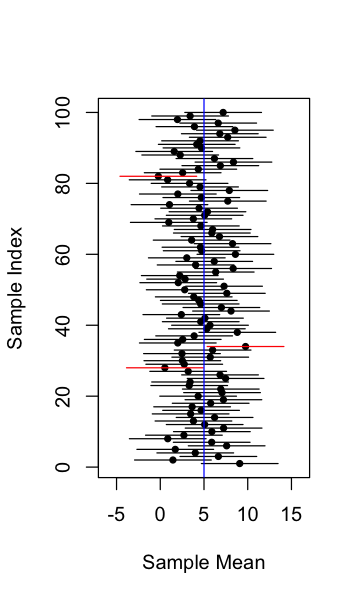

In [105]:
library(dplyr)
options_org = options()
options(repr.plot.width=3, repr.plot.height=5)


plot_intervals = function(output) {
    # number of intervals do not contain mu
    count = 0
    x_bars = output$x_bars
    cis_l = output$cis_l
    cis_u = output$cis_u

    n_samples = length(x_bars)
    
    plot(x_bars, 1:n_samples, pch=20, xlim=c(mu - 5*std, mu + 5*std), xlab='Sample Mean', ylab='Sample Index')

    for (i in 1:n_samples) {
        col = 'black'
        if ( ! between(mu, cis_l[i], cis_u[i]) ) {
            count = count+1
            col = 'red'
        }

        segments(cis_l[i], i, cis_u[i], i, col=col)
    }

    abline(v=mu, col='blue')
    cat('Quick Summary:\n- No. of intervels NOT containing mu:', count, '\n')
    cat('- Proportion of times the CI containing mu:', (n_samples - count)/n_samples, '\n-------\n')
}

n = 20
n_samples = 100

plot_intervals(construct_cis(n_samples, n))

### Case 0: Sample Size: 1, Number of Samples: 100

Quick Summary:
- No. of intervels NOT containing mu: 63 
- Proportion of times the CI containing mu: 0.37 
-------


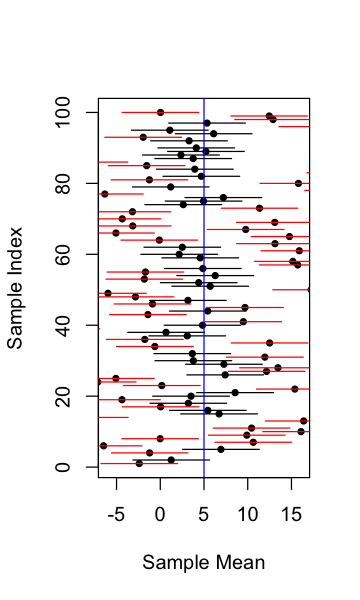

In [106]:
n = 1
n_samples = 100
output = construct_cis(n_samples, n)
plot_intervals(output)

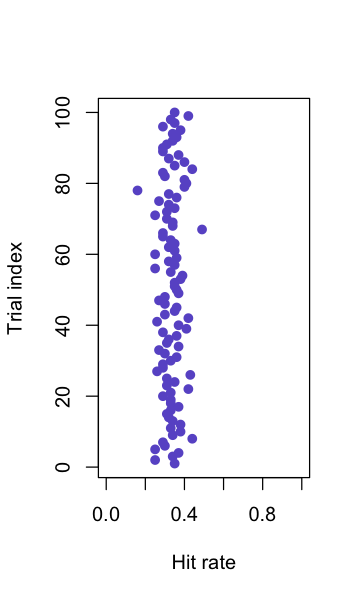

In [107]:
# Repeate the previous experiment 100 times and record to rate at which the confidence interval contains mu
n_repeats = 100
rates = rep(NA, n_repeats)

n = 1
n_samples = 100

for (i in 1:n_repeats) {
    count = 0
    output = construct_cis(n_samples, n)
    cis_l = output$cis_l
    cis_u = output$cis_u
    
    for (j in 1:n_samples) {
        if ( ! between(mu, cis_l[j], cis_u[j]) ) {
            count = count + 1
        }
    }
    rates[i] = (n_samples - count)/n_samples
}

plot(rates, 1:length(rates), xlim=c(0, 1), pch=20, col='slateblue', lwd=3, xlab='Hit rate', ylab='Trial index')

### Case 1: Sample Size: 10, Number of Samples: 1

*Note*: Repeat this experiment a dozen of times until the percentage of the CI containing $\mu$ equal to 1.

Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


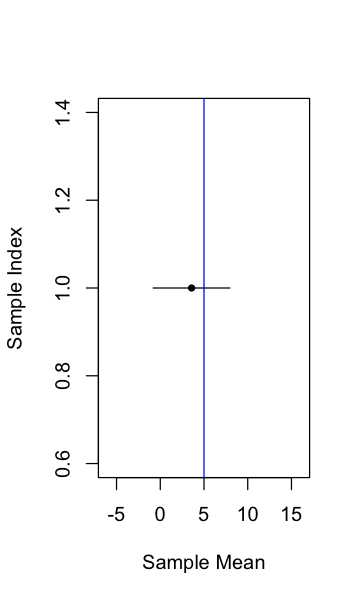

In [108]:
n = 10
n_samples = 1
output = construct_cis(n_samples, n)
plot_intervals(output)

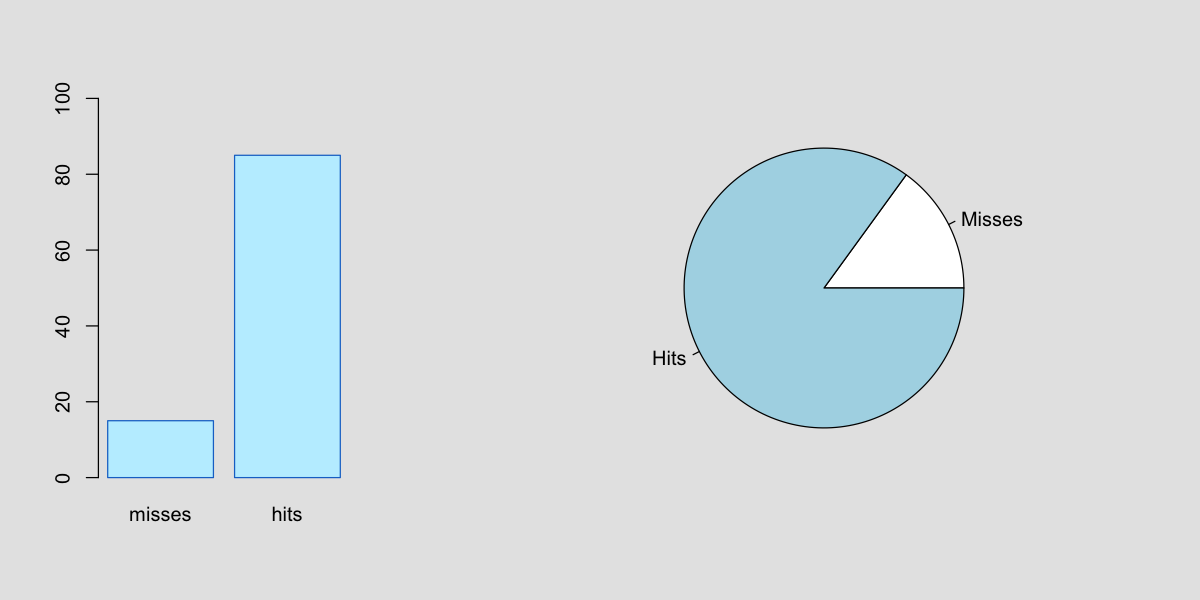

In [165]:
n = 10
n_samples = 1
n_repeats = 100

contains = rep(0, n_repeats)

misses_hits = c(0, 0)

for (i in 1:n_repeats) {
    count = 0
    output = construct_cis(n_samples, n)
    cis_l = output$cis_l
    cis_u = output$cis_u
    
    for (j in 1:n_samples) {
        if (between(mu, cis_l[j], cis_u[j]) ) {
            misses_hits[2] = misses_hits[2] + 1
        } else {
            misses_hits[1] = misses_hits[1] + 1
        }
    }
}


options(repr.plot.width=10, repr.plot.height=5)

par(mfrow=c(1,2), bg='gray90')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 1, ncol = 2),heights = c(1), widths = c(10, 20))

barplot(misses_hits, ylim=c(0, 100), names.arg=c('misses', 'hits'), col="lightblue1", border="dodgerblue3" )
pie(misses_hits, labels = c('Misses', 'Hits'), radius=1.2)

### Case 2: Sample Size: 10, Number of Samples: 10

Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.6 
-------


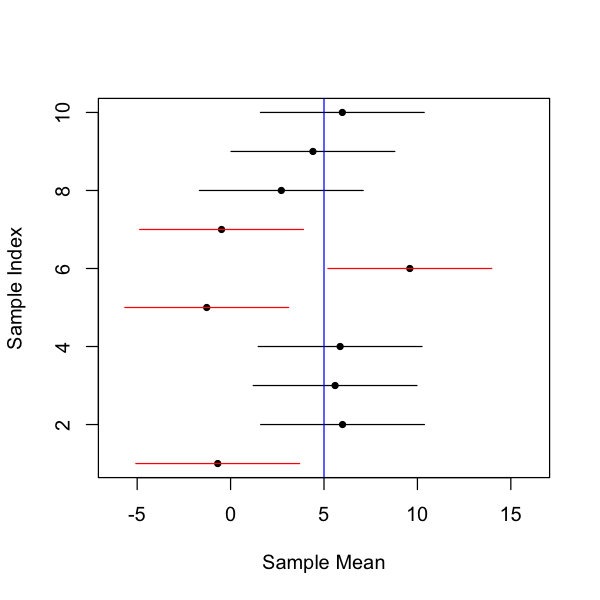

In [170]:
n = 10
n_samples = 10

options(repr.plot.width=5, repr.plot.height=5)
plot_intervals(construct_cis(n_samples, n))

### Case 3: Sample Size: 10, Number of Samples: 100

Quick Summary:
- No. of intervels NOT containing mu: 23 
- Proportion of times the CI containing mu: 0.77 
-------


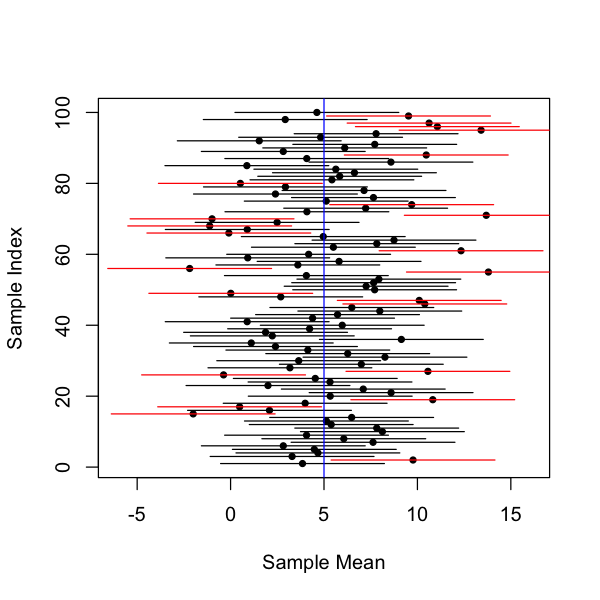

In [171]:
n = 10
n_samples = 100

plot_intervals(construct_cis(n_samples, n))

### Case 4: Sample Size: 30, Number of Samples: 100

Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.98 
-------


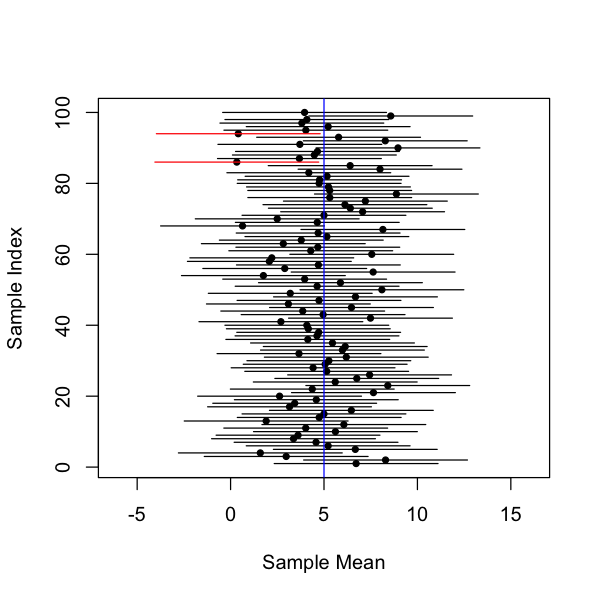

In [172]:
n = 30
n_samples = 100

plot_intervals(construct_cis(n_samples, n))

### Case 5: Sample Size: 50, Number of Samples: 100

Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


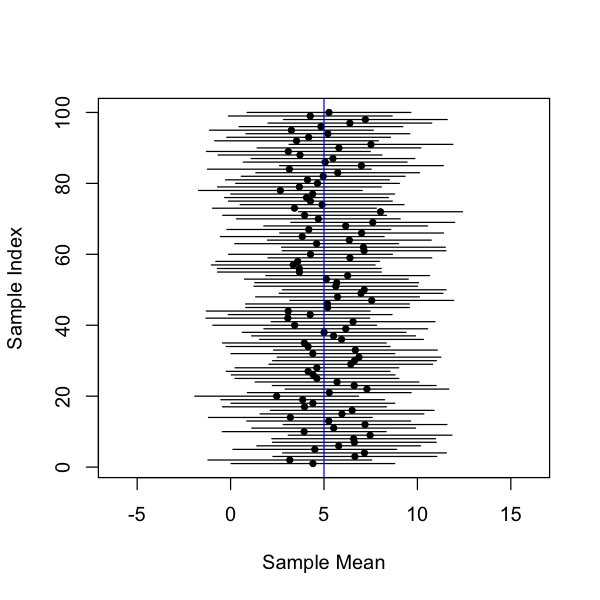

In [173]:
n = 50
n_samples = 100

plot_intervals(construct_cis(n_samples, n))

## Contaminated Distributions

- Model, Data: C+E model, $Y \sim \mu + c\epsilon_{1} + (1-c)\epsilon_{2}$.

In [8]:
mu = 3
sigma = 5

generate_contaminated_samples = function (n, n_samples, k) {
    my = matrix(rep(NA, n_samples*n), ncol=n)

    for (i in 1:n_samples) {
        y = rep(NA, n)
        
        eta = rexp(n, 1/sigma) - 1/sigma
        xi = rnorm(n, 0, sigma)
        b = rbinom(n, 1, k)
#         b = rep(0, n)

        for (j in 1:n) {
            if (b[j] == 0) {
                y[j] = mu + xi[j]
            } else {
                y[j] = mu + eta[j]
            }
        }
        
        my[i, ] = y
    }

    return(my)
}

cis_contaminated_dist = function (n, n_samples, k) {
    mx = matrix(generate_contaminated_samples(n, n_samples, k), ncol=n)
    cis_l = cis_u = rep(NA, n_samples)
    x_bars = rep(NA, n_samples)

    for (i in 1:n_samples) {
        x_bar = mean(mx[i,])
        x_bars[i] = x_bar

        z_a2 = qnorm(alpha/2, 0, 1, lower.tail=F)
        cis_l[i] = x_bar - z_a2 * std
        cis_u[i] = x_bar + z_a2 * std
    }

    return(data.frame(x_bars=x_bars, cis_l=cis_l, cis_u=cis_u))
}

### Figure 1.1: n=1; s_samples=10; k=0

Quick Summary:
- No. of intervels NOT containing mu: 8 
- Proportion of times the CI containing mu: 0.2 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.5 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.6 
-------
Quick Summary:
- No. of intervels NOT containing mu: 8 
- Proportion of times the CI containing mu: 0.2 
-------


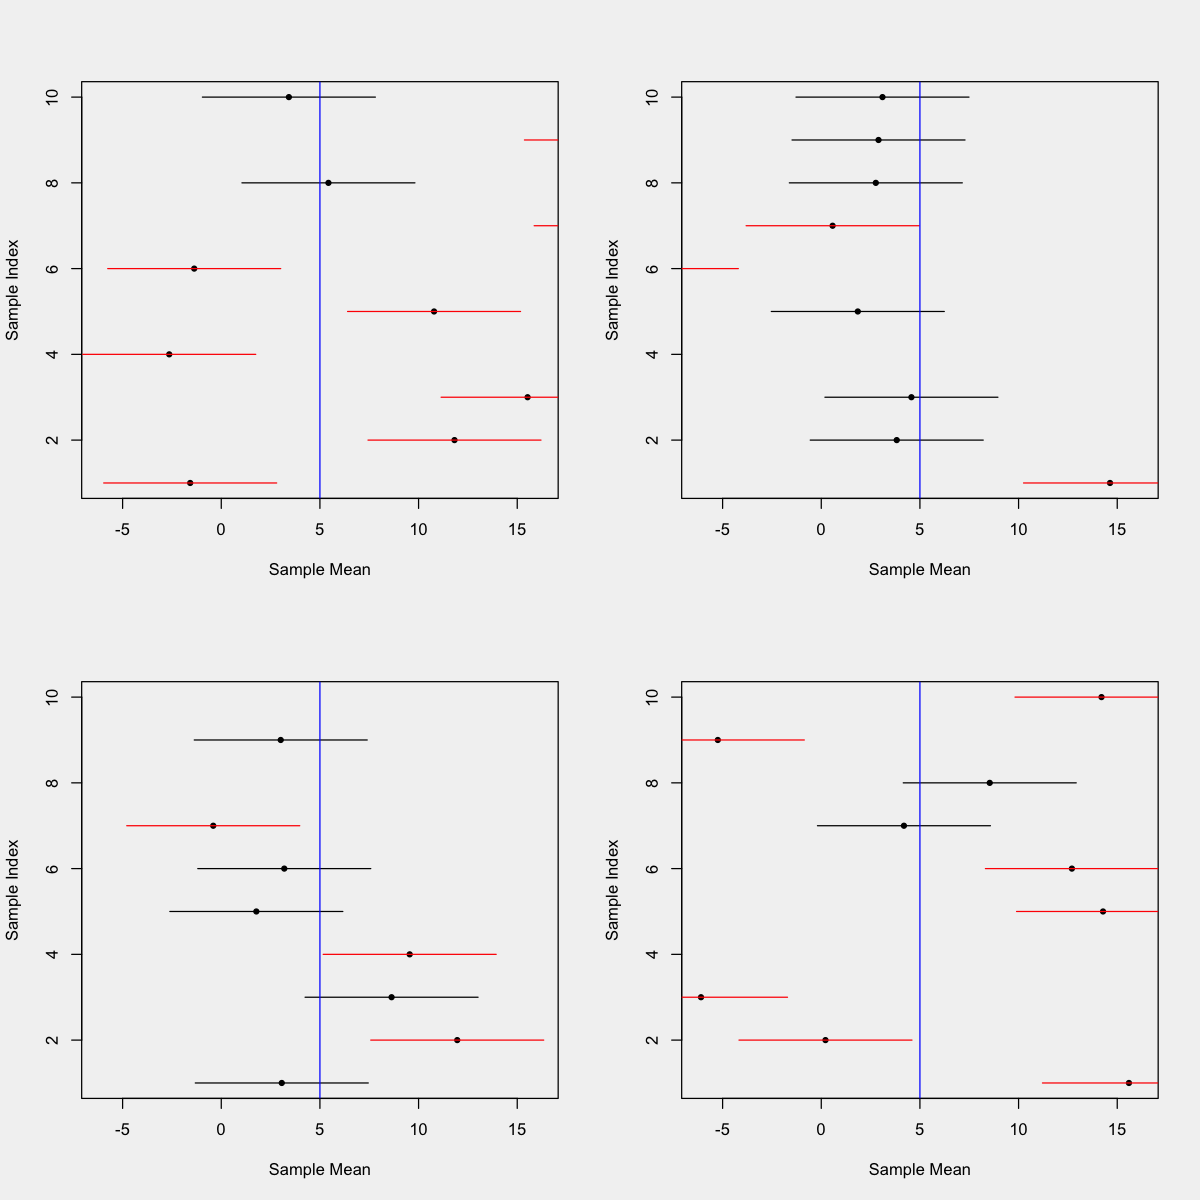

In [211]:
n = 1
n_samples = 10
k=0

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 1.2: n=1; s_samples=10; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.5 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.5 
-------
Quick Summary:
- No. of intervels NOT containing mu: 7 
- Proportion of times the CI containing mu: 0.3 
-------
Quick Summary:
- No. of intervels NOT containing mu: 8 
- Proportion of times the CI containing mu: 0.2 
-------


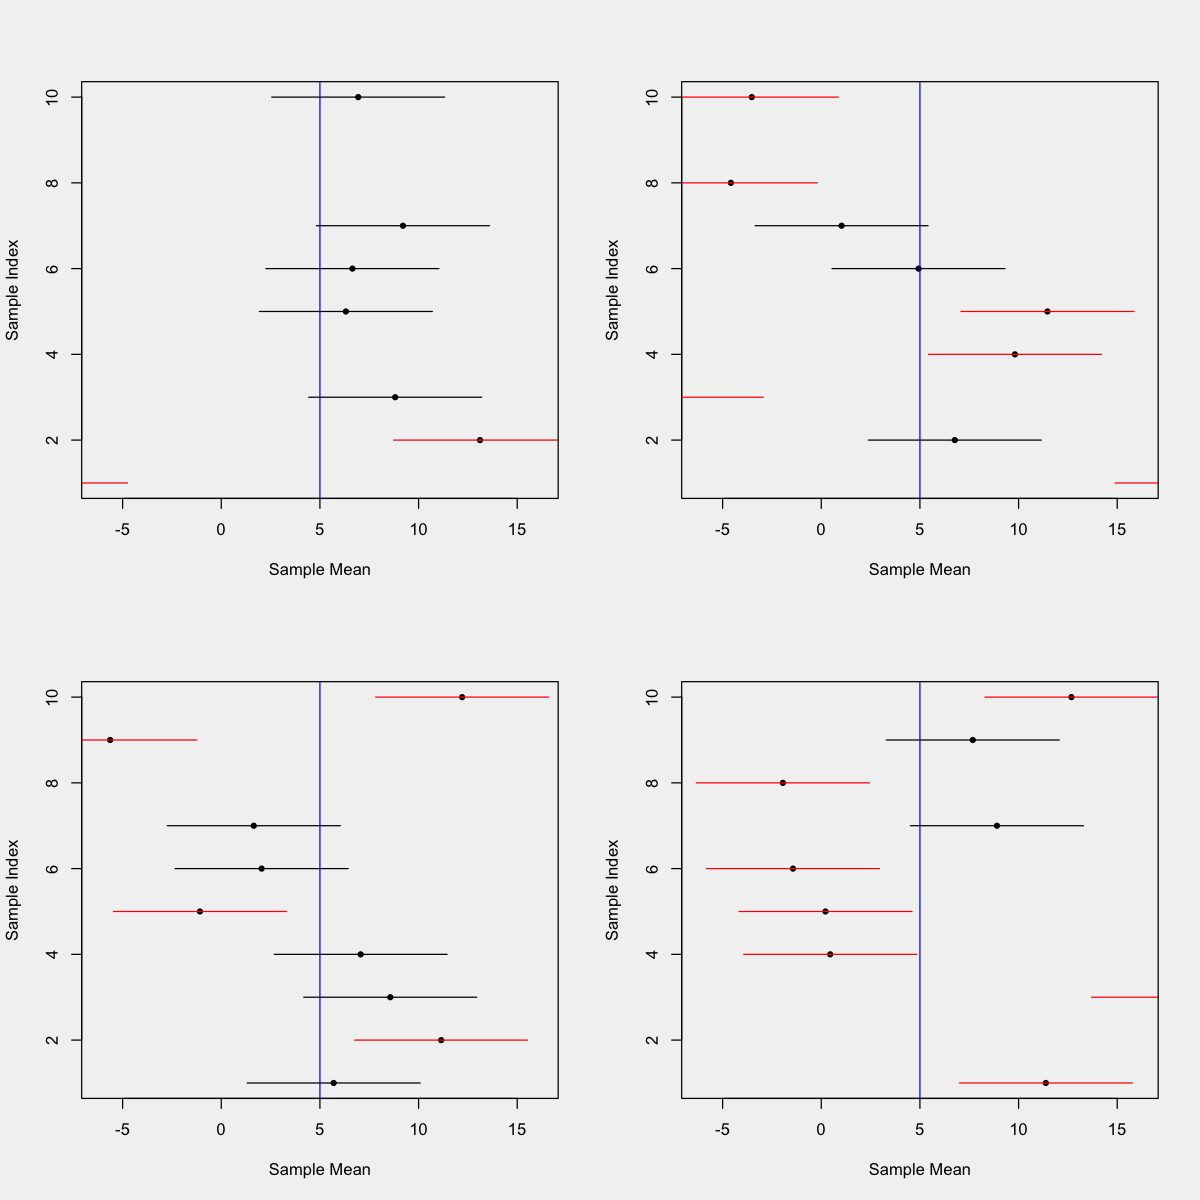

In [212]:
n = 1
n_samples = 10
k=.1

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 1.3: n=1; s_samples=10; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.6 
-------
Quick Summary:
- No. of intervels NOT containing mu: 9 
- Proportion of times the CI containing mu: 0.1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.5 
-------
Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.7 
-------


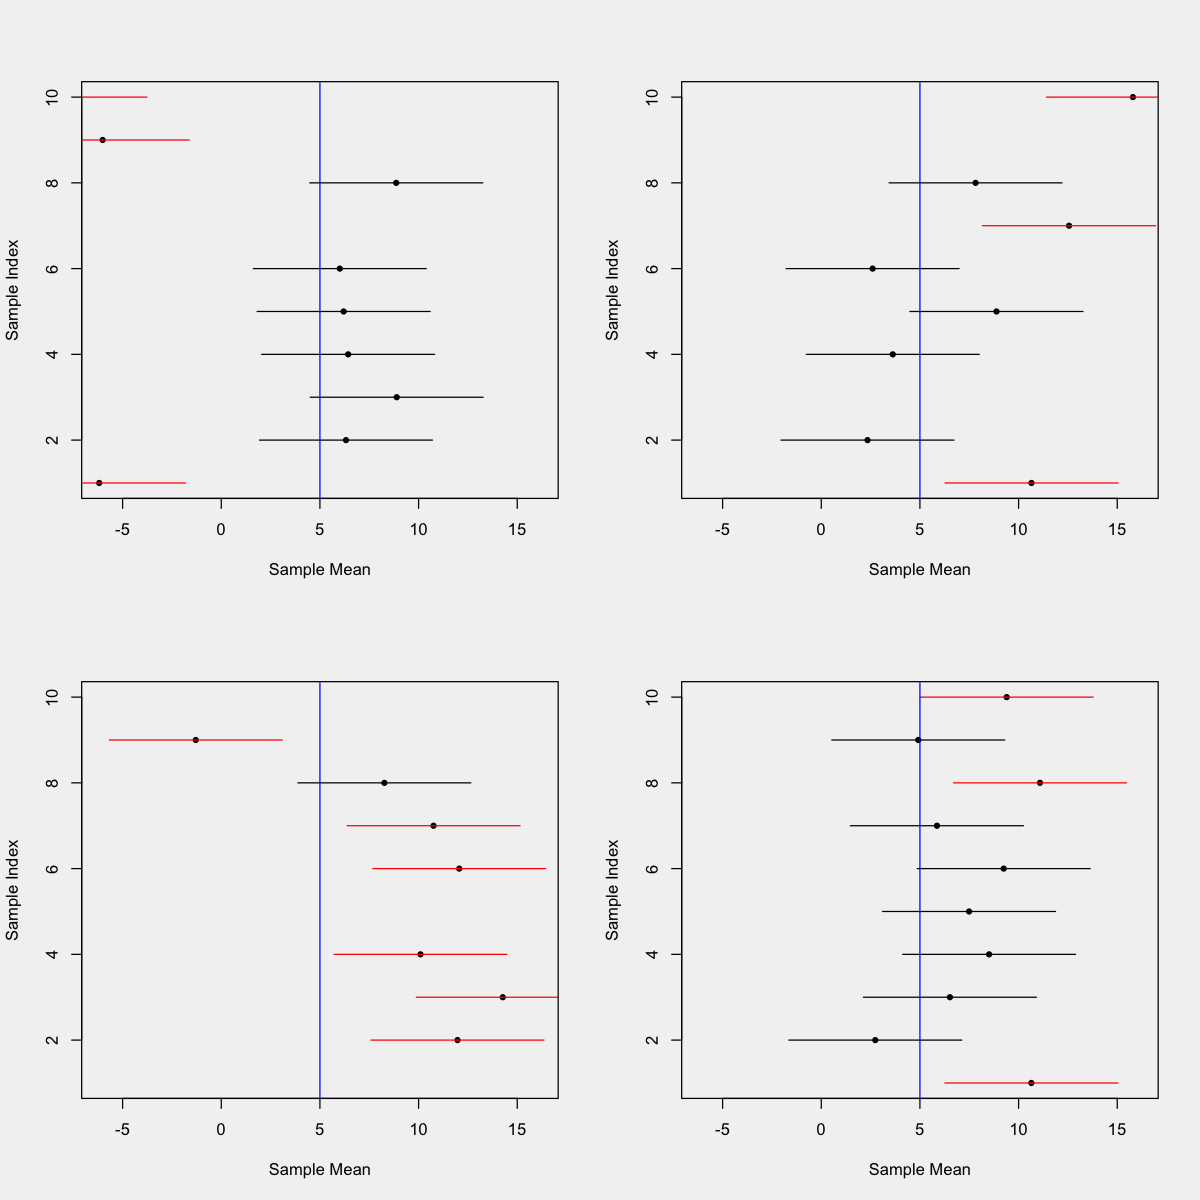

In [221]:
n = 1
n_samples = 10
k=.5

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 1.4: n=1; s_samples=10; k=0.9

Quick Summary:
- No. of intervels NOT containing mu: 9 
- Proportion of times the CI containing mu: 0.1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 7 
- Proportion of times the CI containing mu: 0.3 
-------
Quick Summary:
- No. of intervels NOT containing mu: 6 
- Proportion of times the CI containing mu: 0.4 
-------
Quick Summary:
- No. of intervels NOT containing mu: 8 
- Proportion of times the CI containing mu: 0.2 
-------


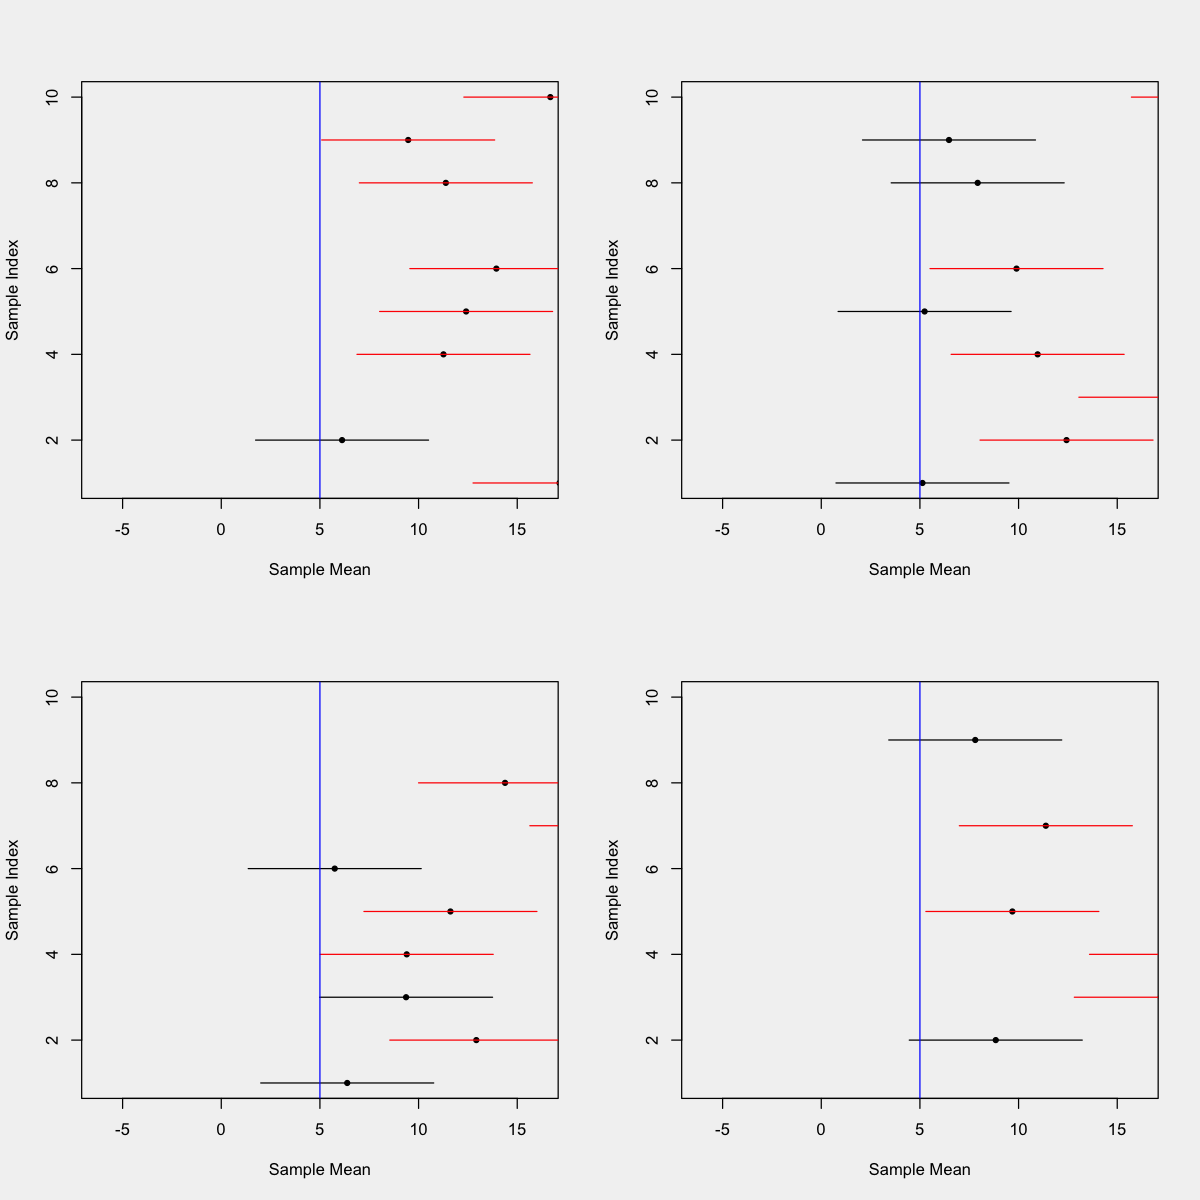

In [222]:
n = 1
n_samples = 10
k=.9

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 2.1: n=1; s_samples=100; k=0

Quick Summary:
- No. of intervels NOT containing mu: 58 
- Proportion of times the CI containing mu: 0.42 
-------
Quick Summary:
- No. of intervels NOT containing mu: 76 
- Proportion of times the CI containing mu: 0.24 
-------
Quick Summary:
- No. of intervels NOT containing mu: 68 
- Proportion of times the CI containing mu: 0.32 
-------
Quick Summary:
- No. of intervels NOT containing mu: 61 
- Proportion of times the CI containing mu: 0.39 
-------


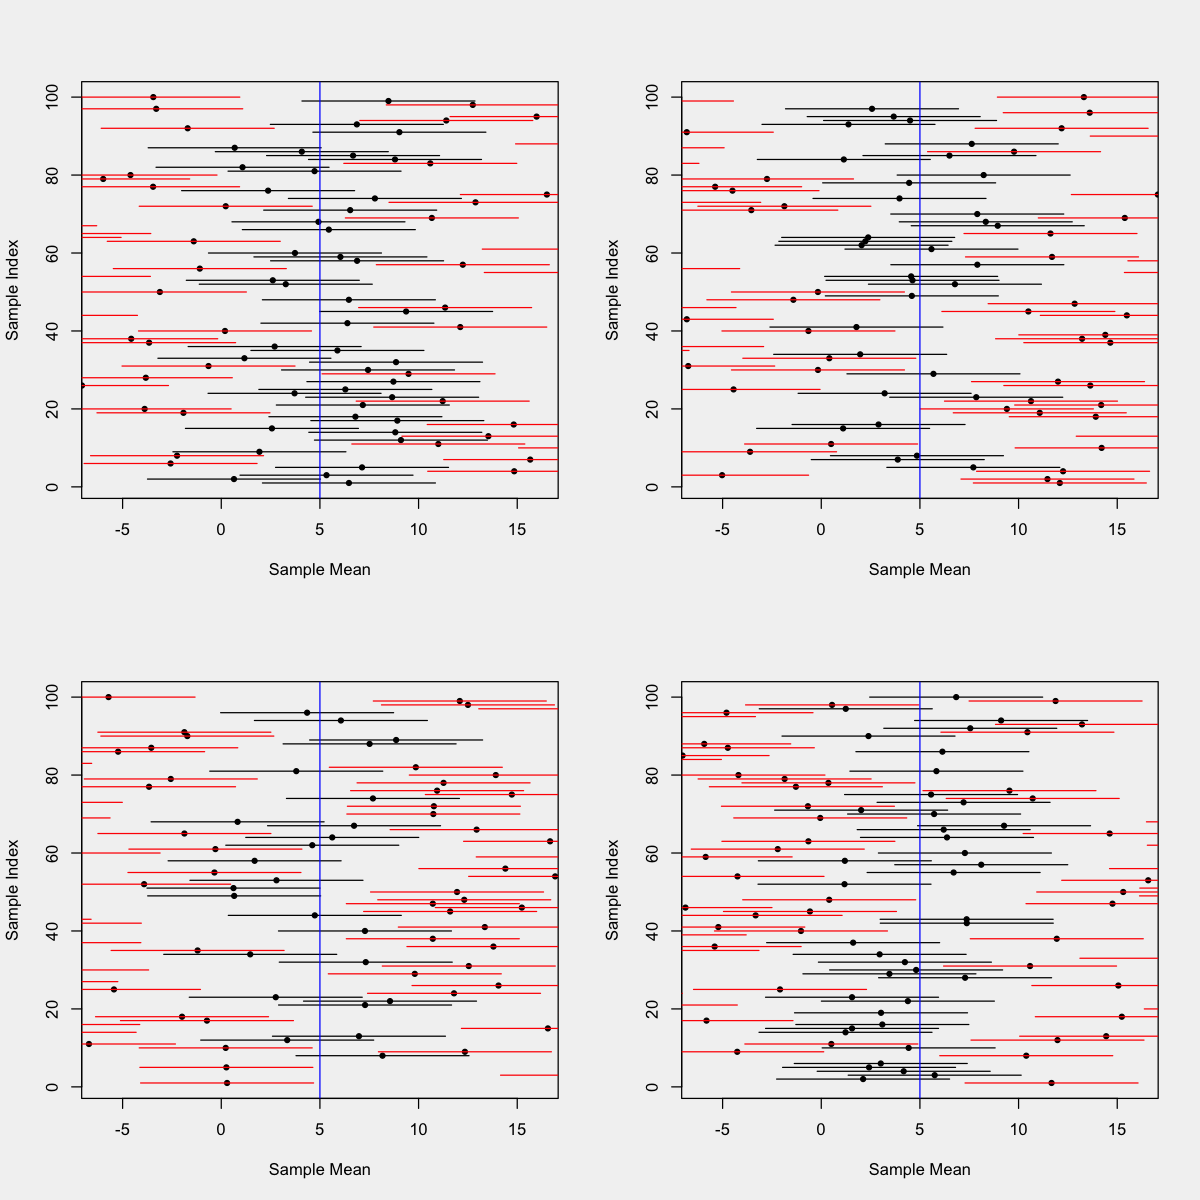

In [215]:
n = 1
n_samples = 100
k=0

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 2.2: n=1; s_samples=100; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 69 
- Proportion of times the CI containing mu: 0.31 
-------
Quick Summary:
- No. of intervels NOT containing mu: 77 
- Proportion of times the CI containing mu: 0.23 
-------
Quick Summary:
- No. of intervels NOT containing mu: 64 
- Proportion of times the CI containing mu: 0.36 
-------
Quick Summary:
- No. of intervels NOT containing mu: 71 
- Proportion of times the CI containing mu: 0.29 
-------


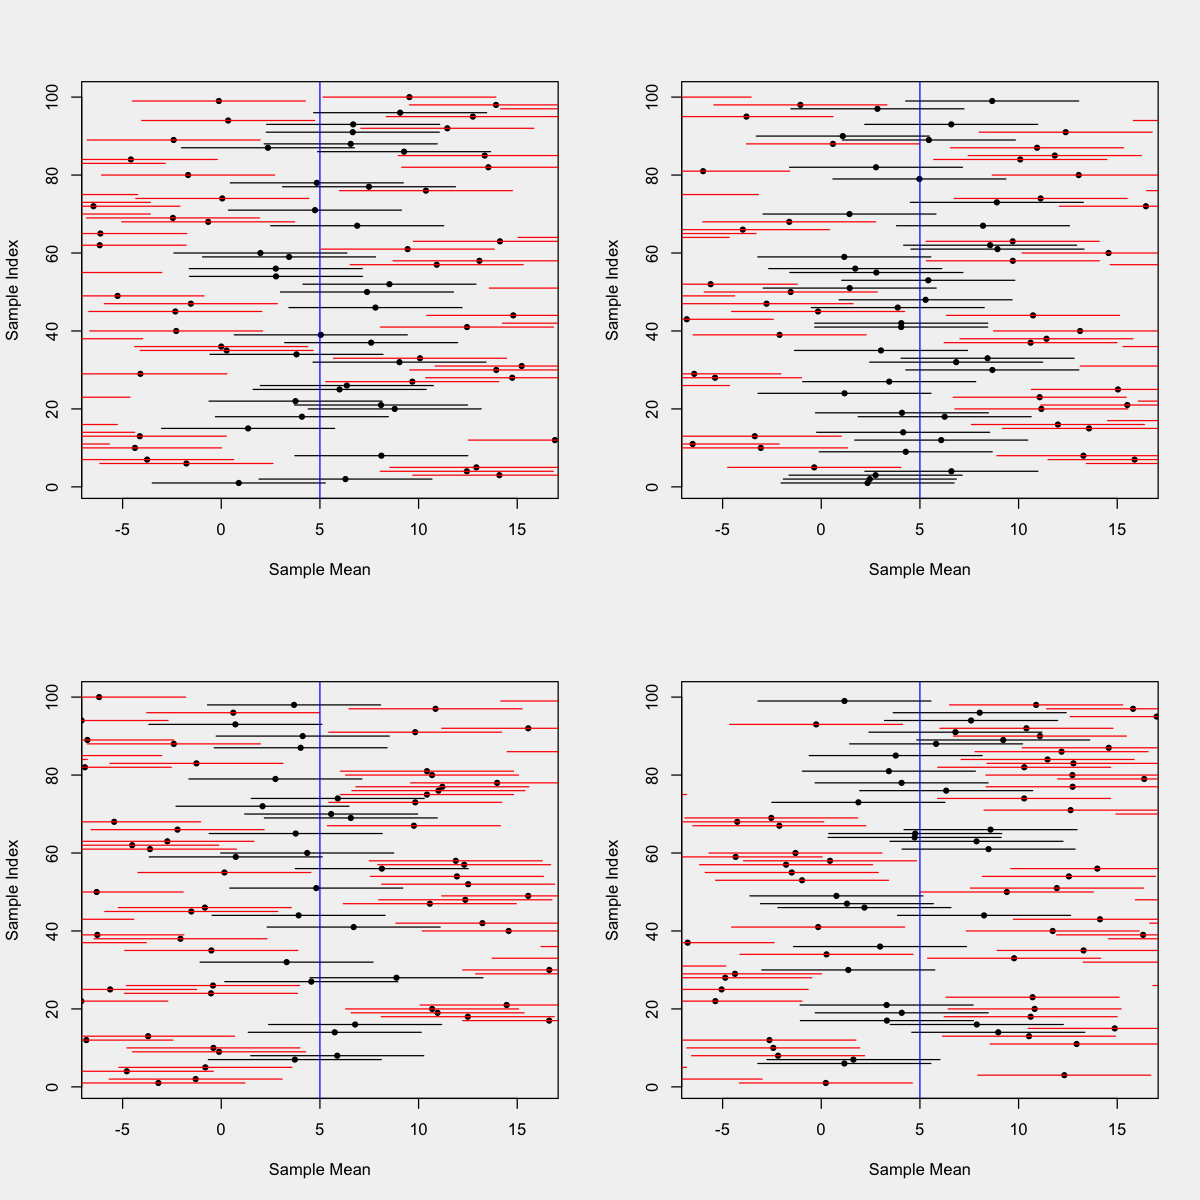

In [217]:
n = 1
n_samples = 100
k=0.1

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 2.3: n=1; s_samples=100; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 69 
- Proportion of times the CI containing mu: 0.31 
-------
Quick Summary:
- No. of intervels NOT containing mu: 56 
- Proportion of times the CI containing mu: 0.44 
-------
Quick Summary:
- No. of intervels NOT containing mu: 64 
- Proportion of times the CI containing mu: 0.36 
-------
Quick Summary:
- No. of intervels NOT containing mu: 67 
- Proportion of times the CI containing mu: 0.33 
-------


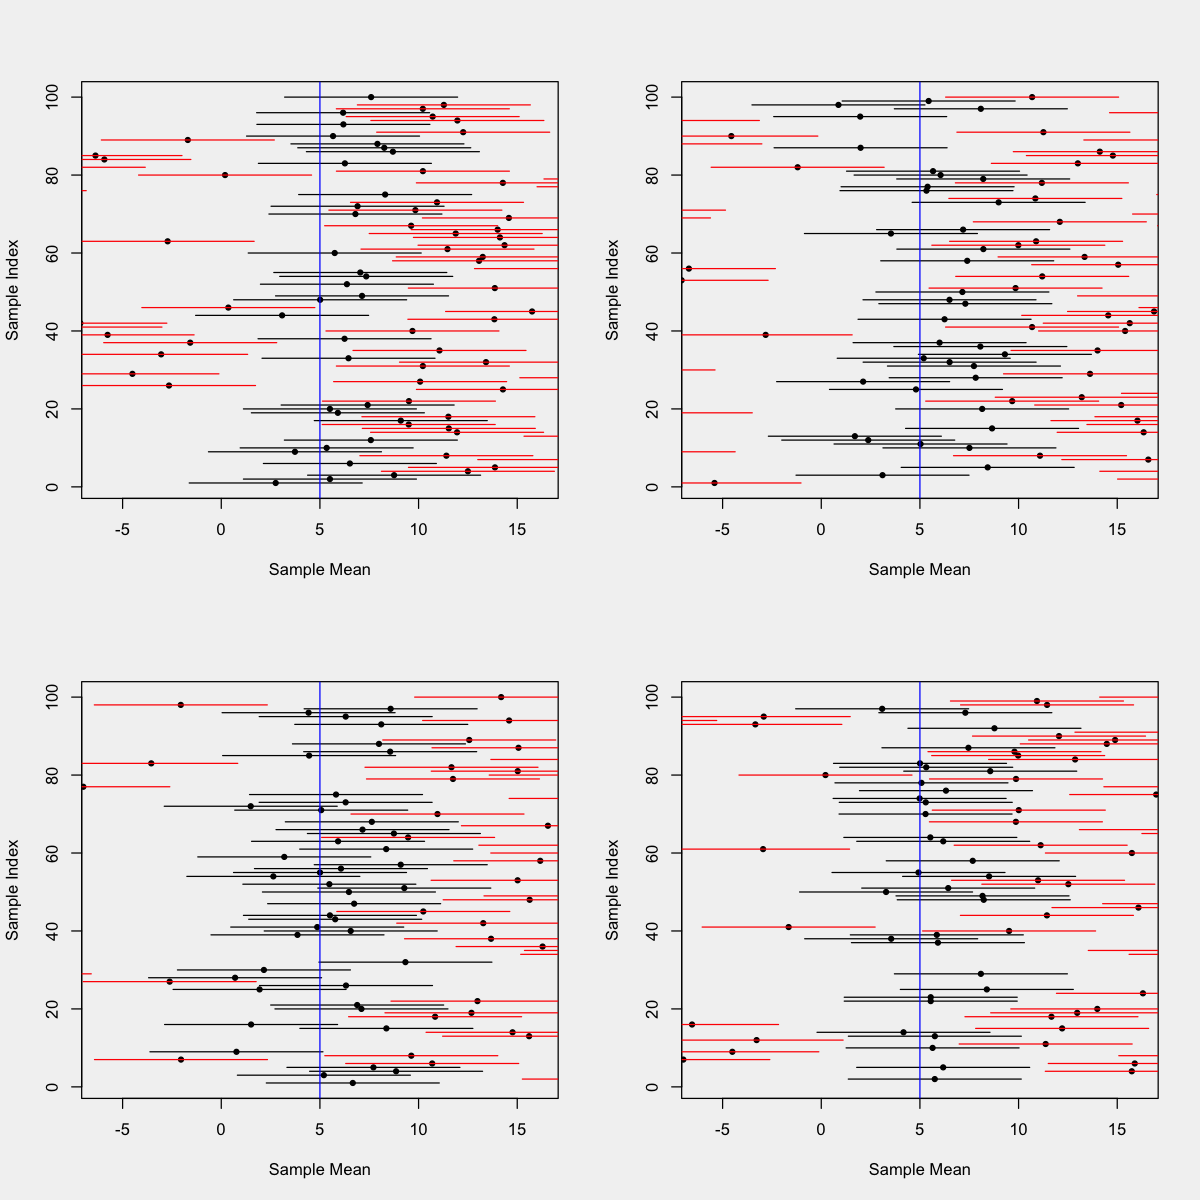

In [216]:
n = 1
n_samples = 100
k=0.5

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 2.4: n=1; s_samples=100; k=0.9

Quick Summary:
- No. of intervels NOT containing mu: 67 
- Proportion of times the CI containing mu: 0.33 
-------
Quick Summary:
- No. of intervels NOT containing mu: 67 
- Proportion of times the CI containing mu: 0.33 
-------
Quick Summary:
- No. of intervels NOT containing mu: 62 
- Proportion of times the CI containing mu: 0.38 
-------
Quick Summary:
- No. of intervels NOT containing mu: 70 
- Proportion of times the CI containing mu: 0.3 
-------


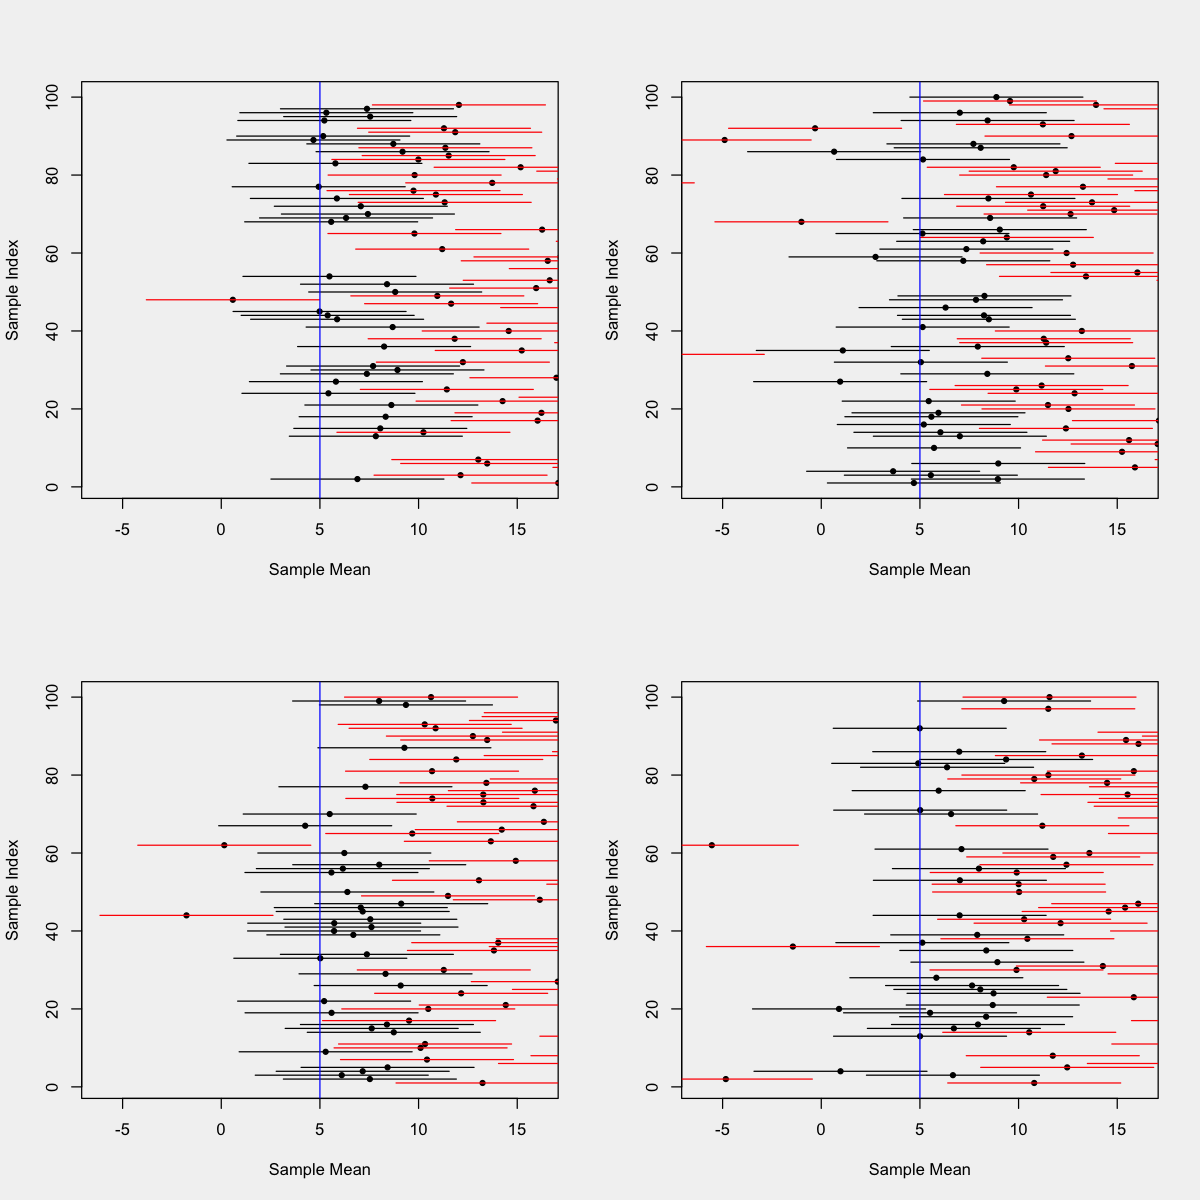

In [223]:
n = 1
n_samples = 100
k=0.9

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 3.1: n=10; s_samples=100; k=0

Quick Summary:
- No. of intervels NOT containing mu: 18 
- Proportion of times the CI containing mu: 0.82 
-------
Quick Summary:
- No. of intervels NOT containing mu: 17 
- Proportion of times the CI containing mu: 0.83 
-------
Quick Summary:
- No. of intervels NOT containing mu: 15 
- Proportion of times the CI containing mu: 0.85 
-------
Quick Summary:
- No. of intervels NOT containing mu: 17 
- Proportion of times the CI containing mu: 0.83 
-------


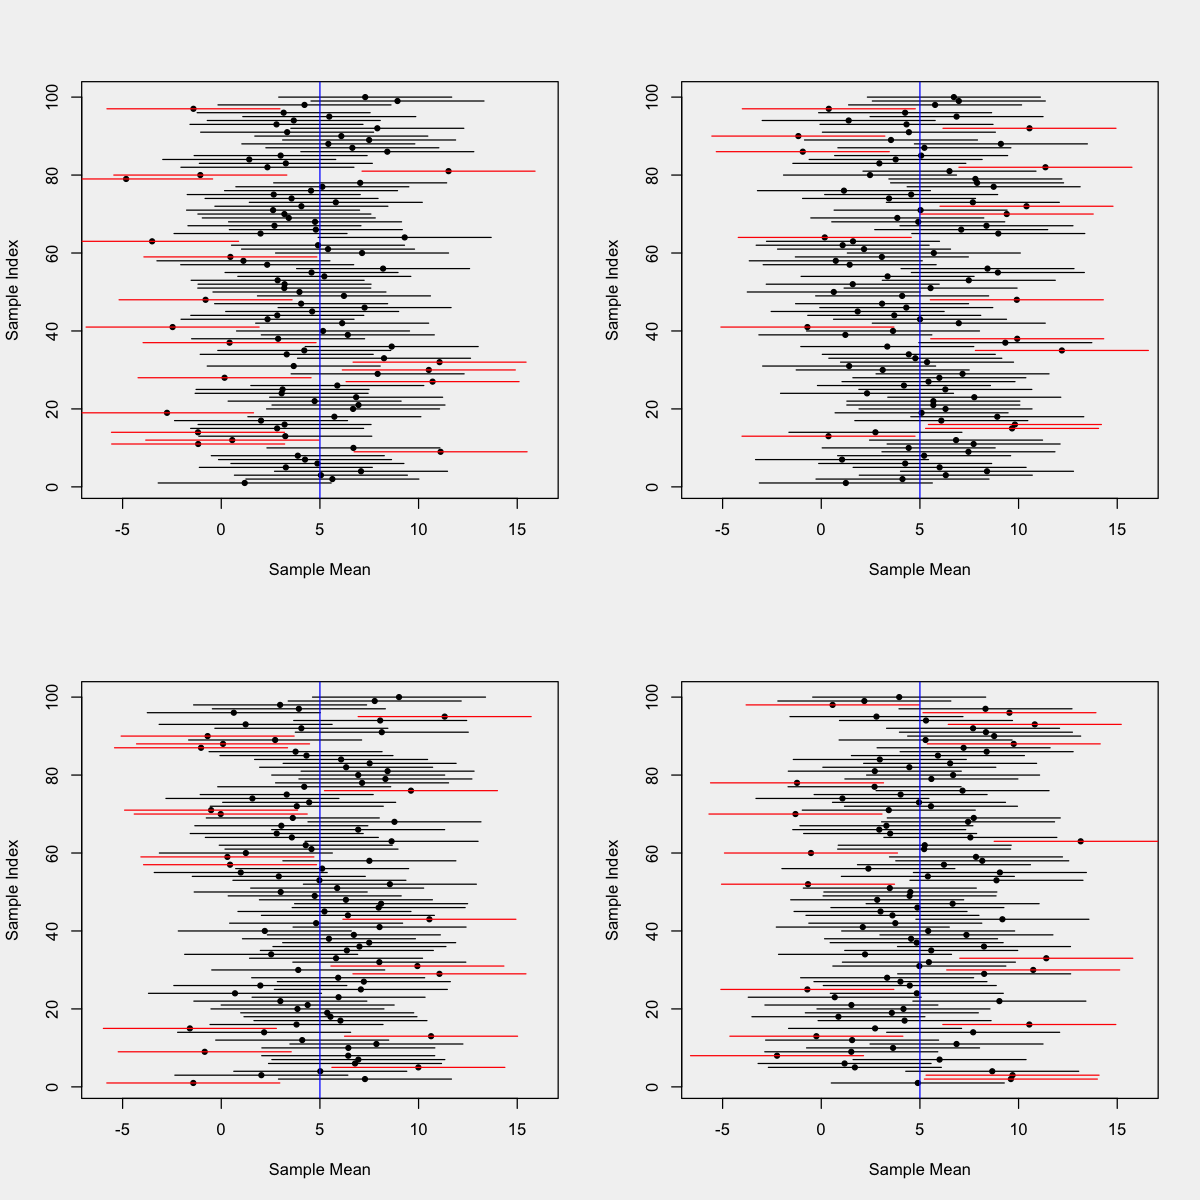

In [224]:
n = 10
n_samples = 100
k=0

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 3.2: n=10; s_samples=100; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 13 
- Proportion of times the CI containing mu: 0.87 
-------
Quick Summary:
- No. of intervels NOT containing mu: 20 
- Proportion of times the CI containing mu: 0.8 
-------
Quick Summary:
- No. of intervels NOT containing mu: 21 
- Proportion of times the CI containing mu: 0.79 
-------
Quick Summary:
- No. of intervels NOT containing mu: 20 
- Proportion of times the CI containing mu: 0.8 
-------


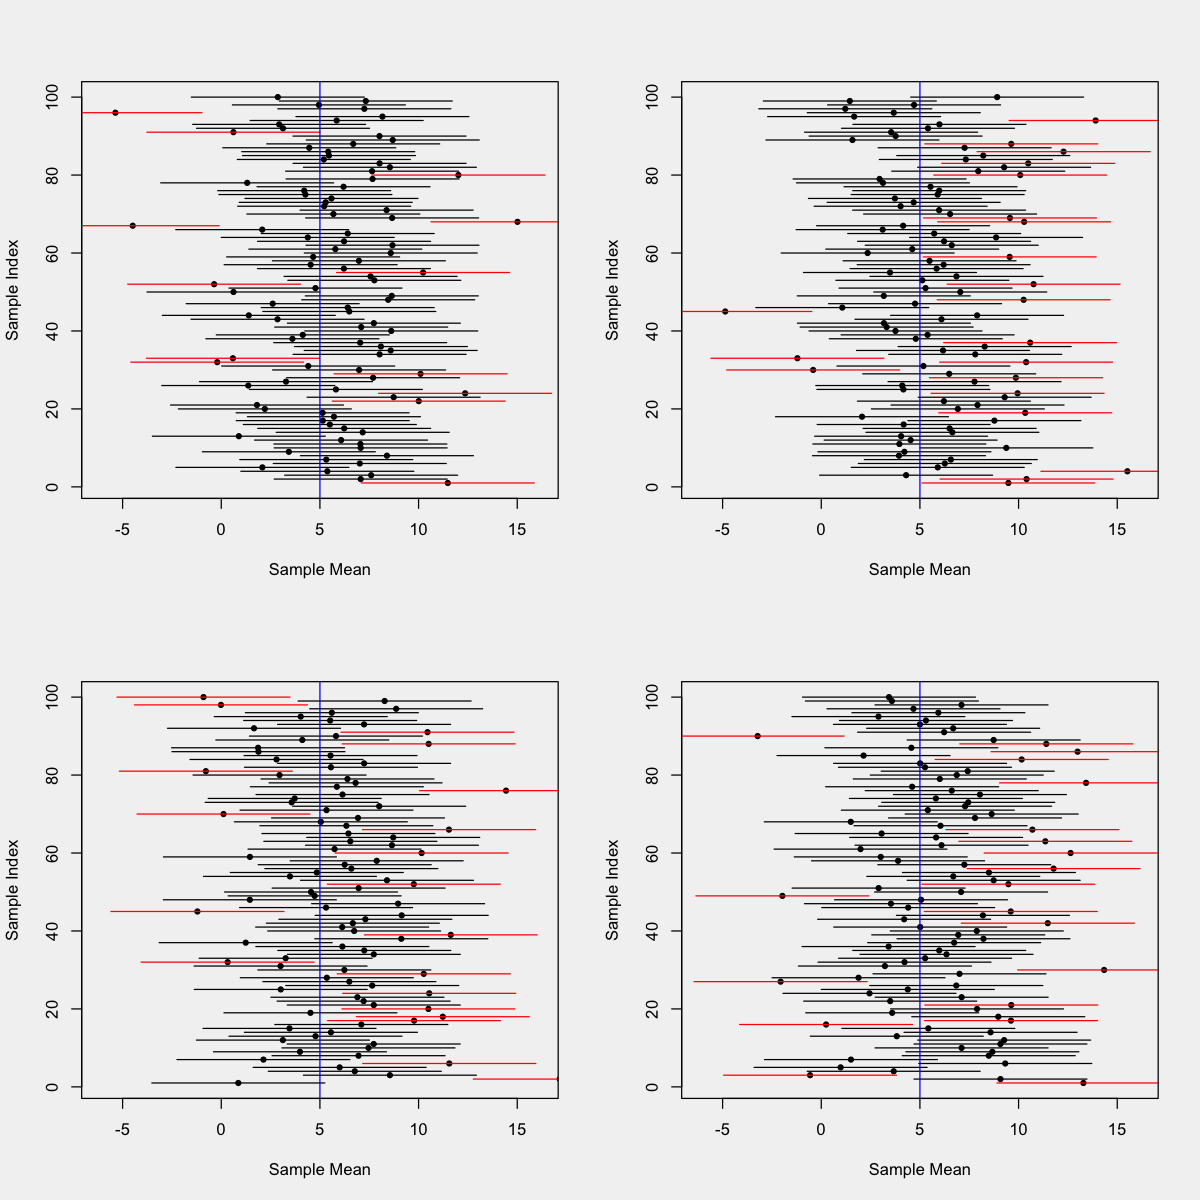

In [219]:
n = 10
n_samples = 100
k=0.1

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 3.3: n=10; s_samples=100; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 57 
- Proportion of times the CI containing mu: 0.43 
-------
Quick Summary:
- No. of intervels NOT containing mu: 49 
- Proportion of times the CI containing mu: 0.51 
-------
Quick Summary:
- No. of intervels NOT containing mu: 63 
- Proportion of times the CI containing mu: 0.37 
-------
Quick Summary:
- No. of intervels NOT containing mu: 63 
- Proportion of times the CI containing mu: 0.37 
-------


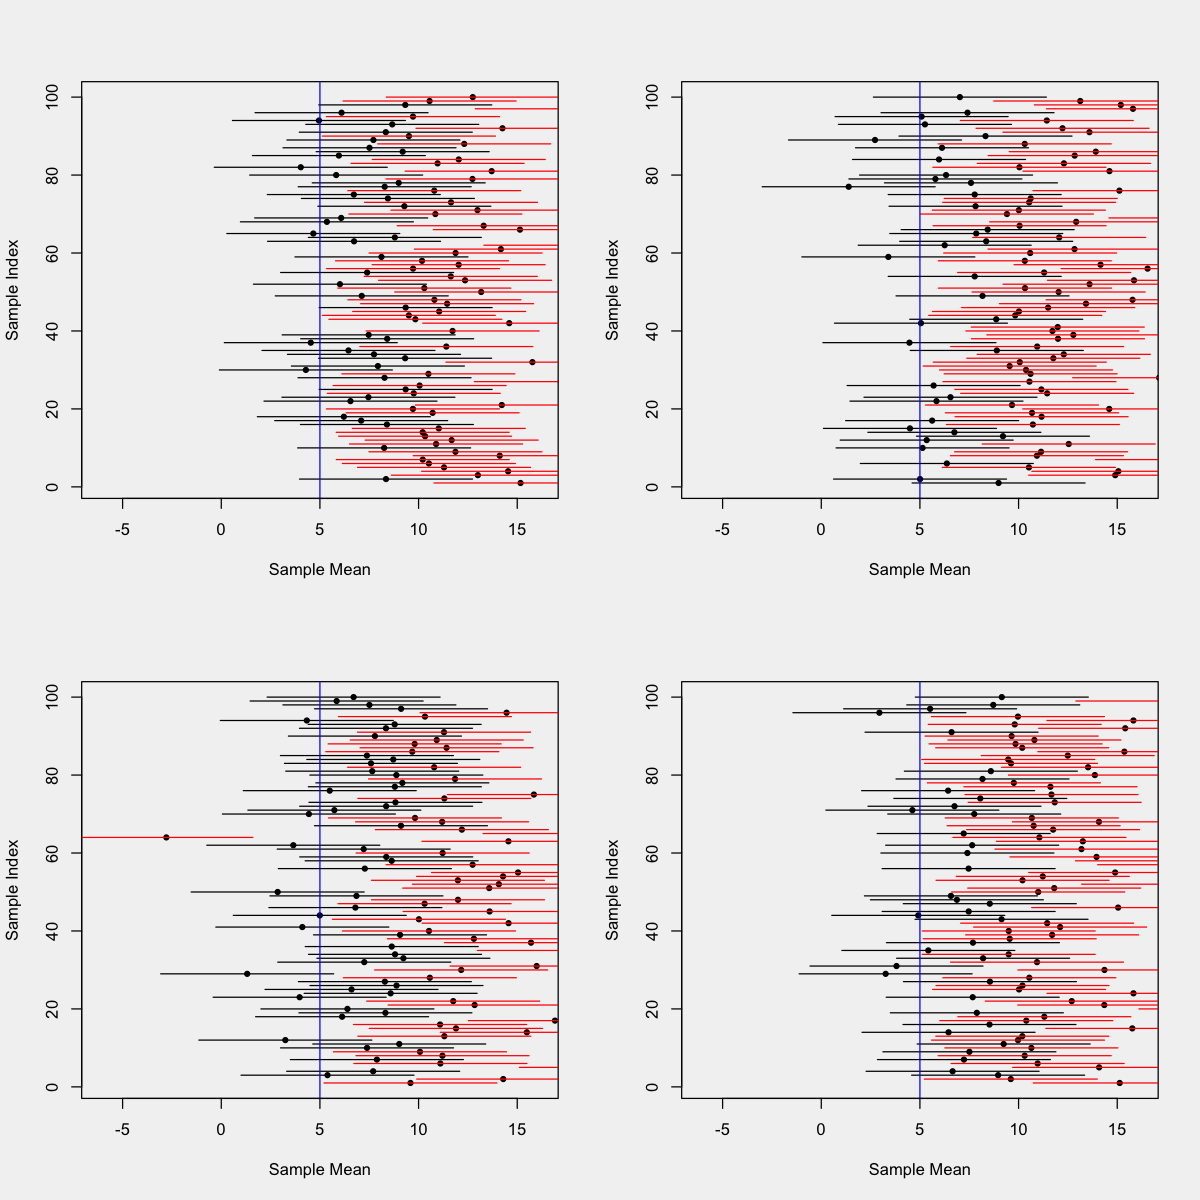

In [220]:
n = 10
n_samples = 100
k=0.5

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 4.1: n=30; s_samples=100; k=0

Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------
Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.97 
-------
Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------


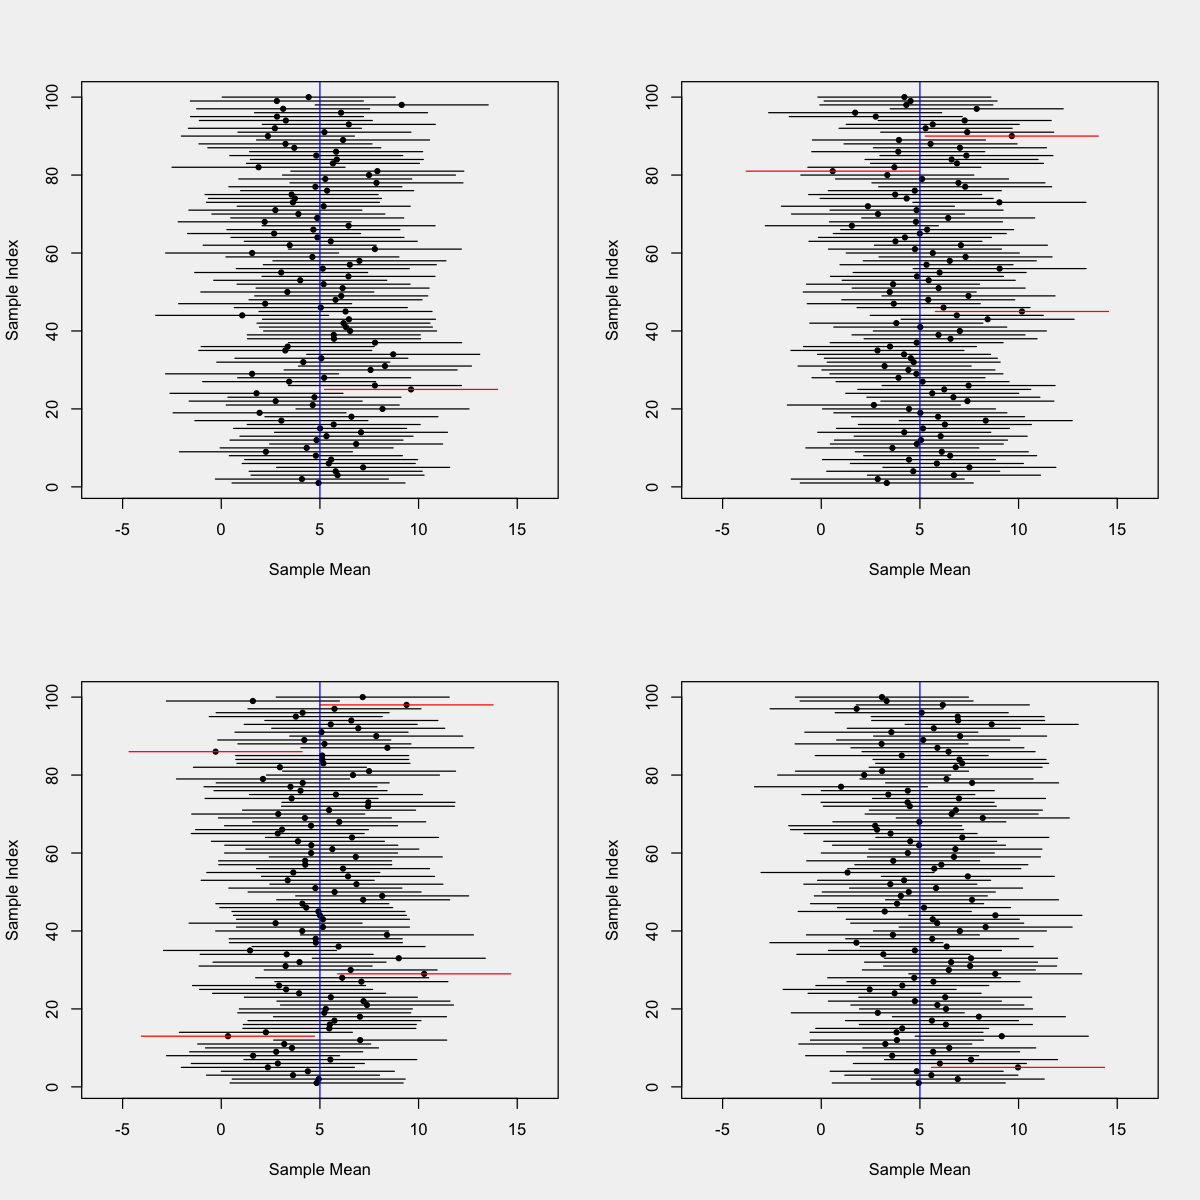

In [226]:
n = 30
n_samples = 100
k=0

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 4.2: n=30; s_samples=100; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.97 
-------
Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.98 
-------
Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.98 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.95 
-------


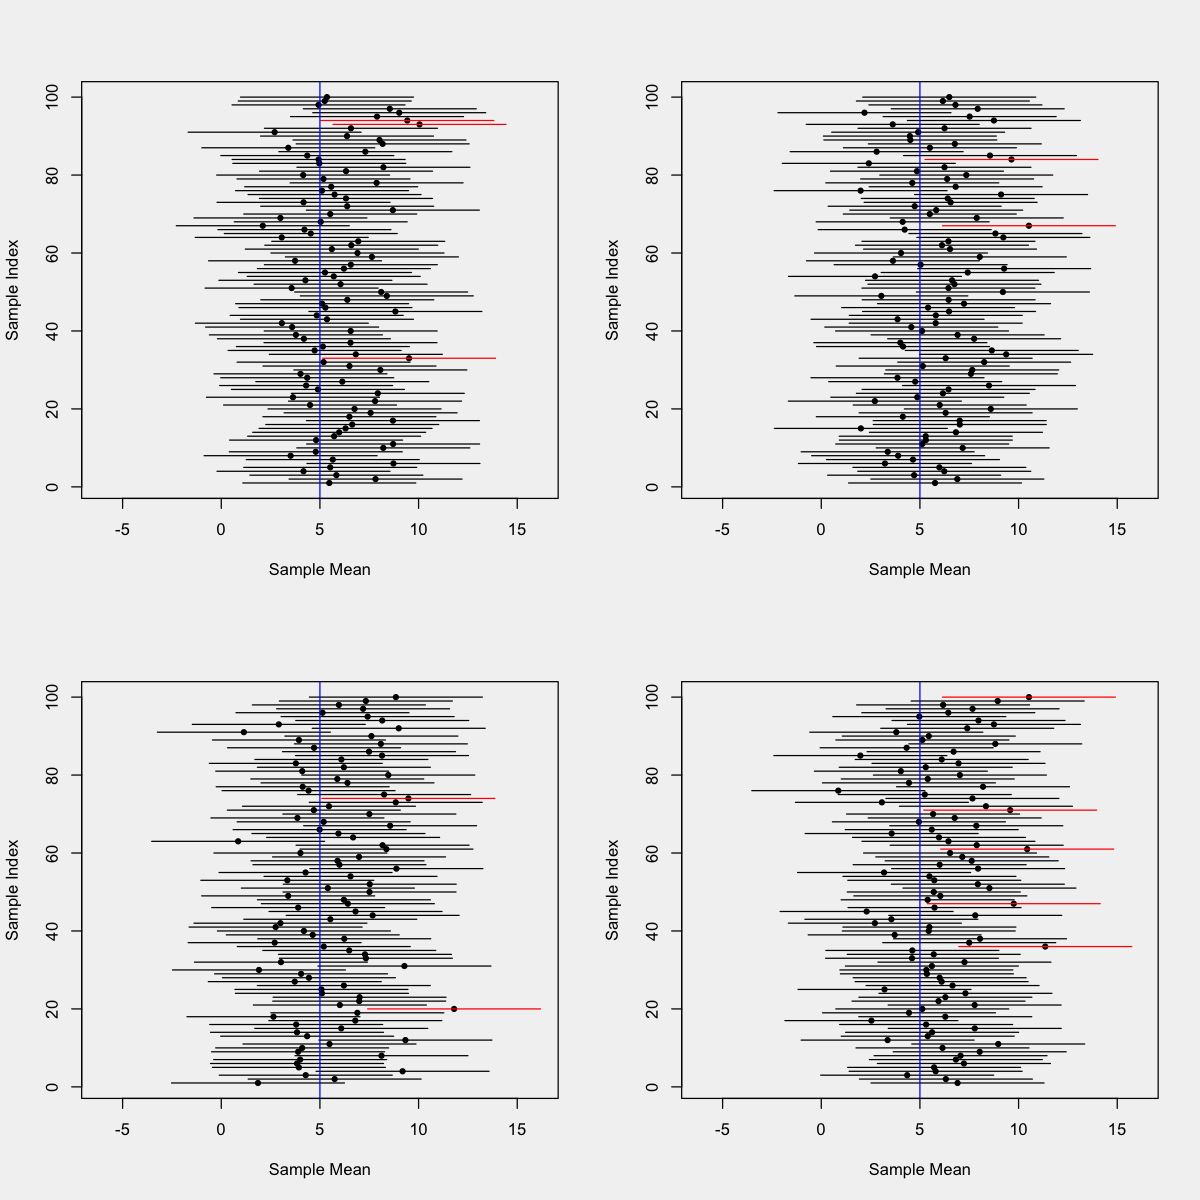

In [229]:
n = 30
n_samples = 100
k=0.1

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 4.3: n=30; s_samples=100; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 66 
- Proportion of times the CI containing mu: 0.34 
-------
Quick Summary:
- No. of intervels NOT containing mu: 55 
- Proportion of times the CI containing mu: 0.45 
-------
Quick Summary:
- No. of intervels NOT containing mu: 54 
- Proportion of times the CI containing mu: 0.46 
-------
Quick Summary:
- No. of intervels NOT containing mu: 56 
- Proportion of times the CI containing mu: 0.44 
-------


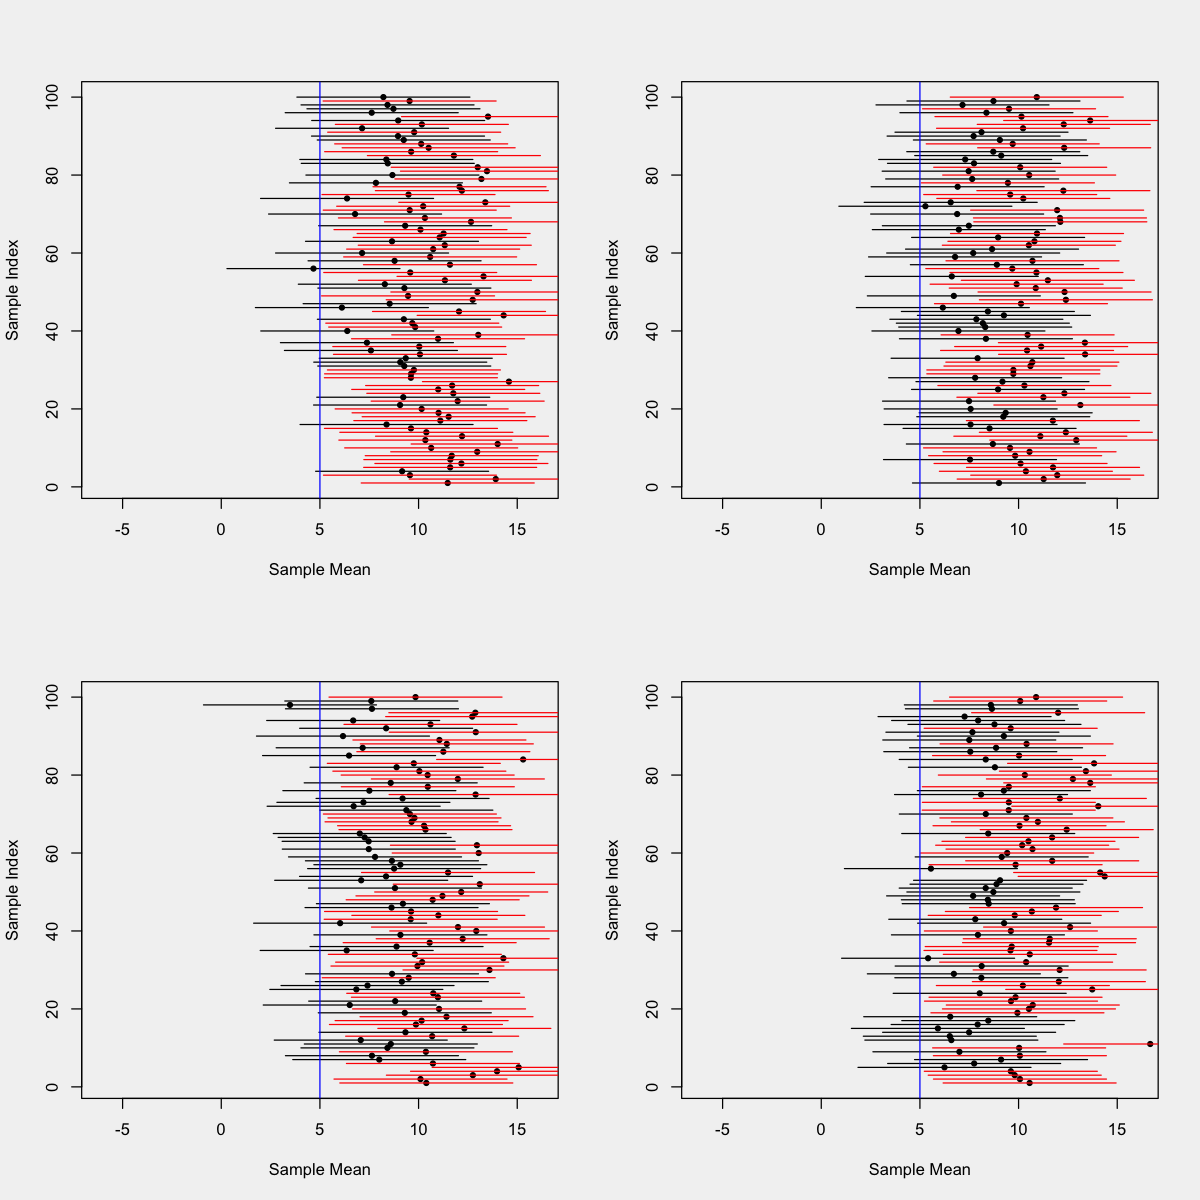

In [228]:
n = 30
n_samples = 100
k=0.5

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 4.4: n=30; s_samples=100; k=0.9

Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------
Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------
Quick Summary:
- No. of intervels NOT containing mu: 99 
- Proportion of times the CI containing mu: 0.01 
-------
Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------


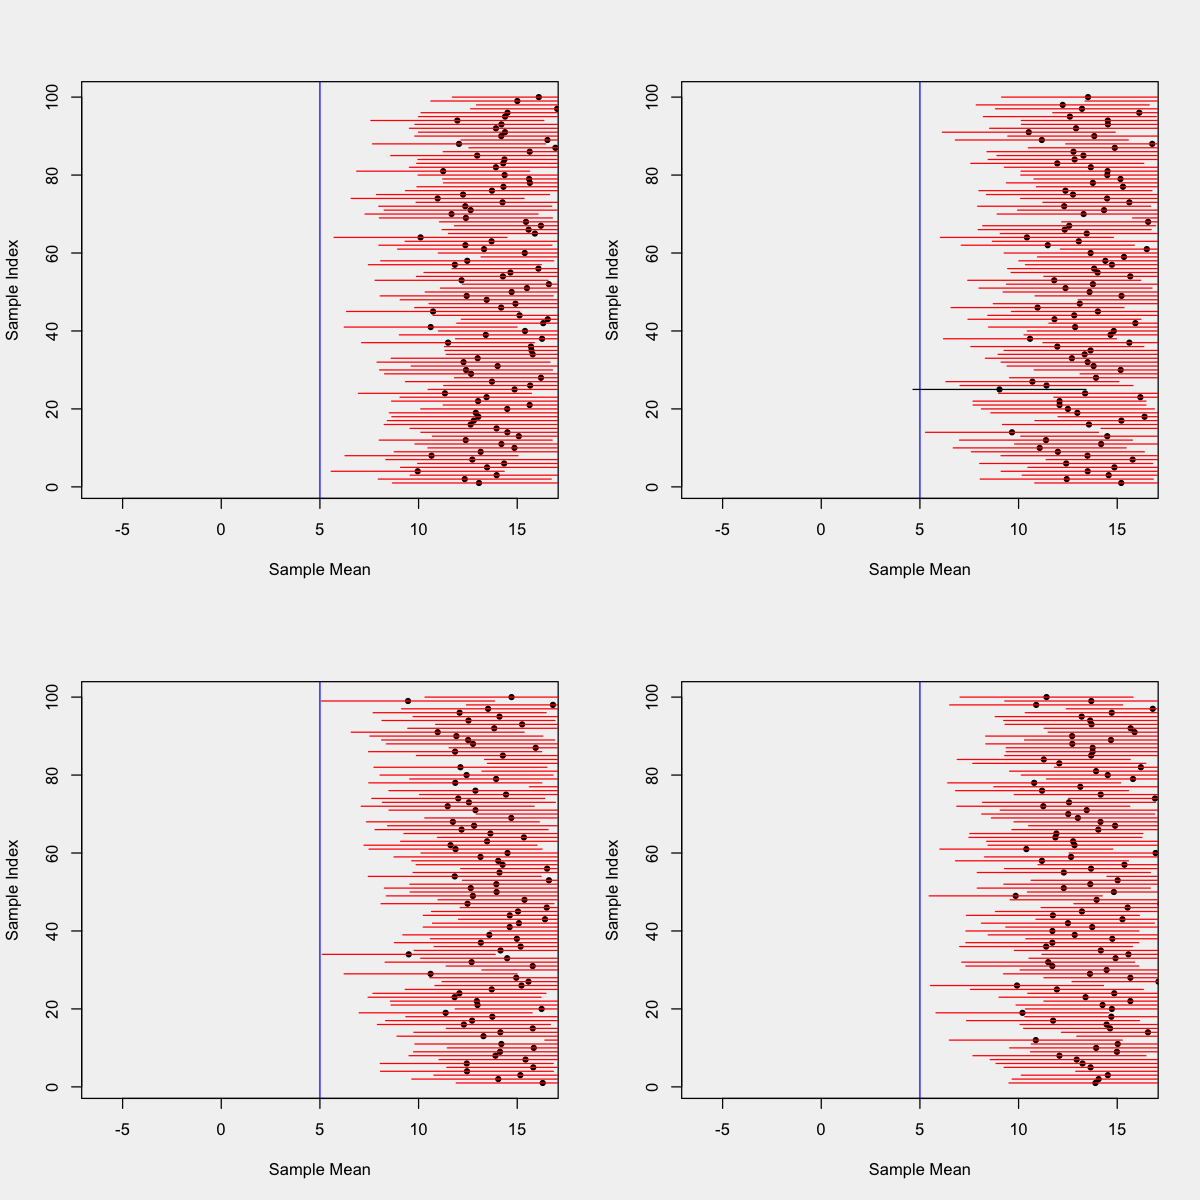

In [230]:
n = 30
n_samples = 100
k=0.9

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 5.1: n=50; s_samples=100; k=0

Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


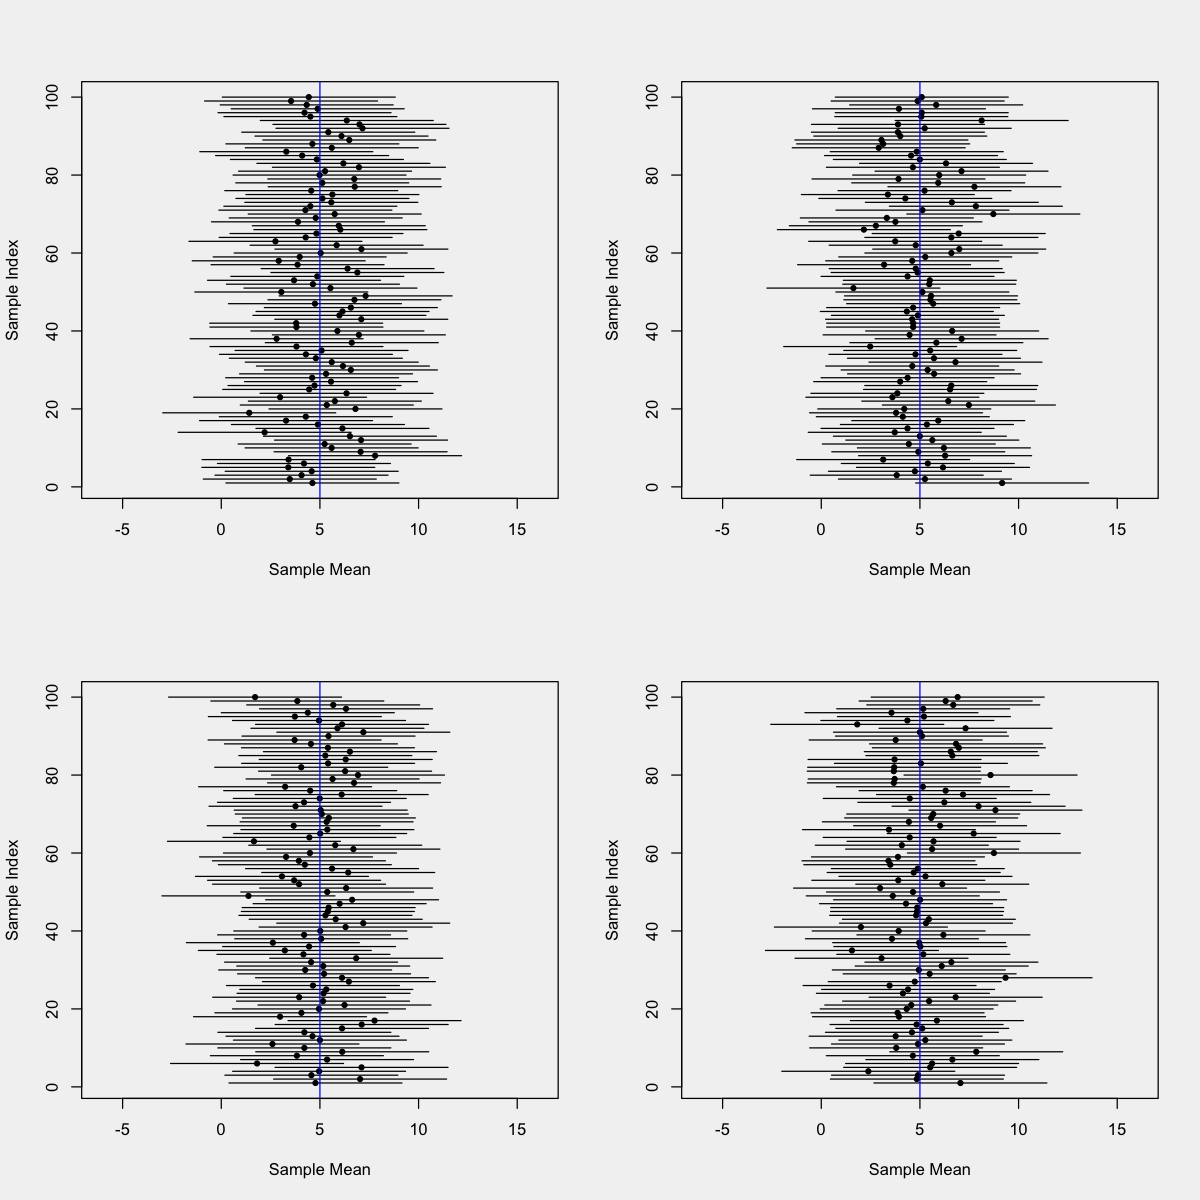

In [231]:
n = 50
n_samples = 100
k=0

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 5.2: n=50; s_samples=100; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------
Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.98 
-------


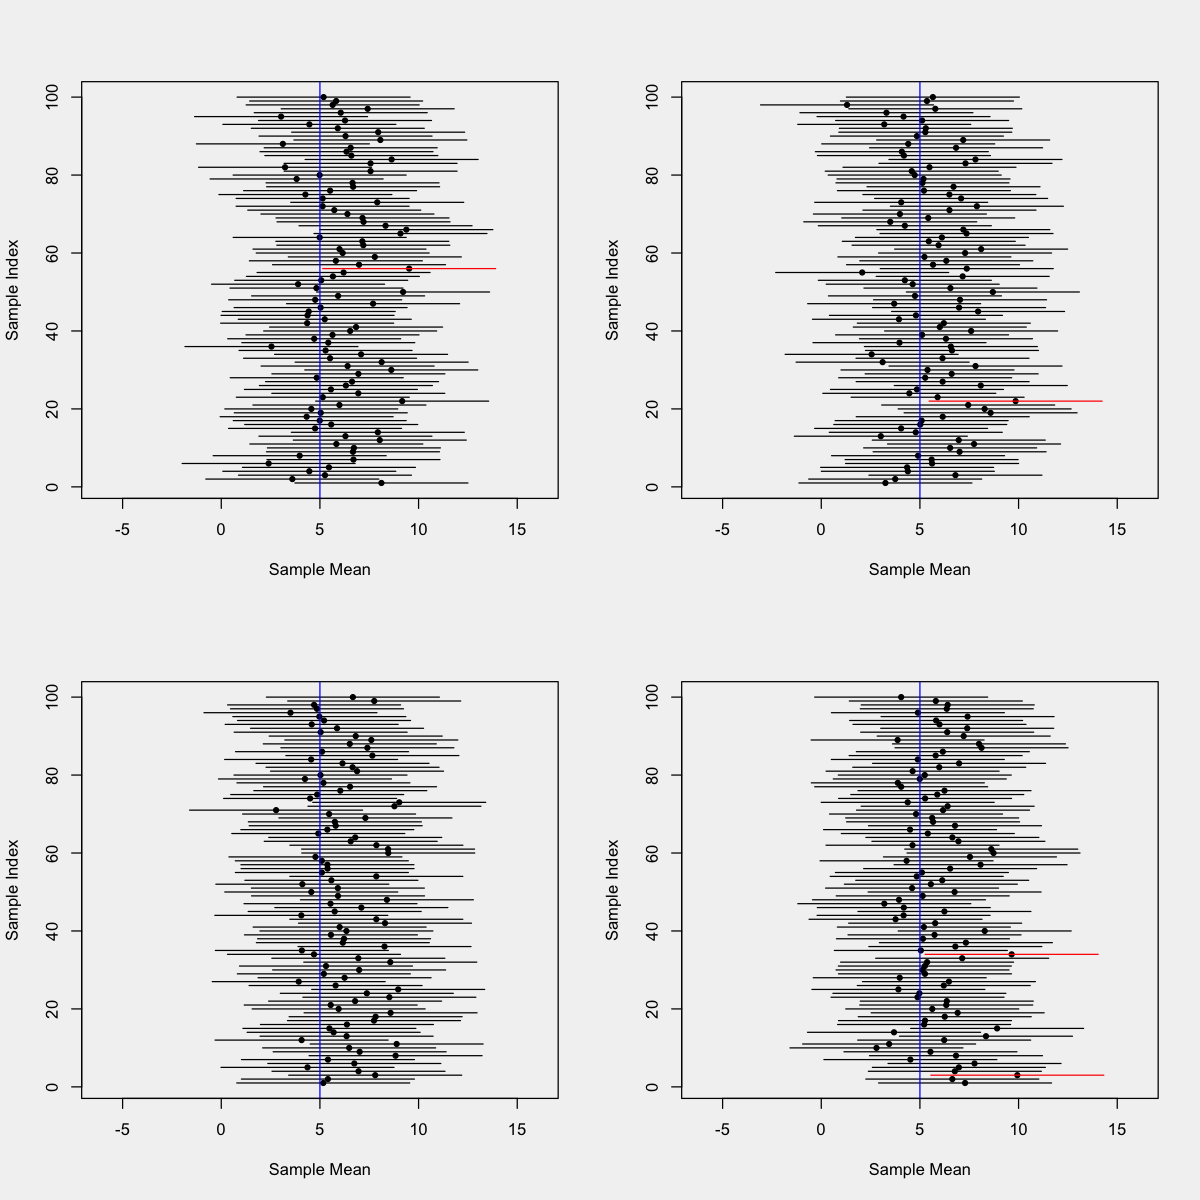

In [232]:
n = 50
n_samples = 100
k=0.1

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 5.3: n=50; s_samples=100; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 66 
- Proportion of times the CI containing mu: 0.34 
-------
Quick Summary:
- No. of intervels NOT containing mu: 62 
- Proportion of times the CI containing mu: 0.38 
-------
Quick Summary:
- No. of intervels NOT containing mu: 61 
- Proportion of times the CI containing mu: 0.39 
-------
Quick Summary:
- No. of intervels NOT containing mu: 65 
- Proportion of times the CI containing mu: 0.35 
-------


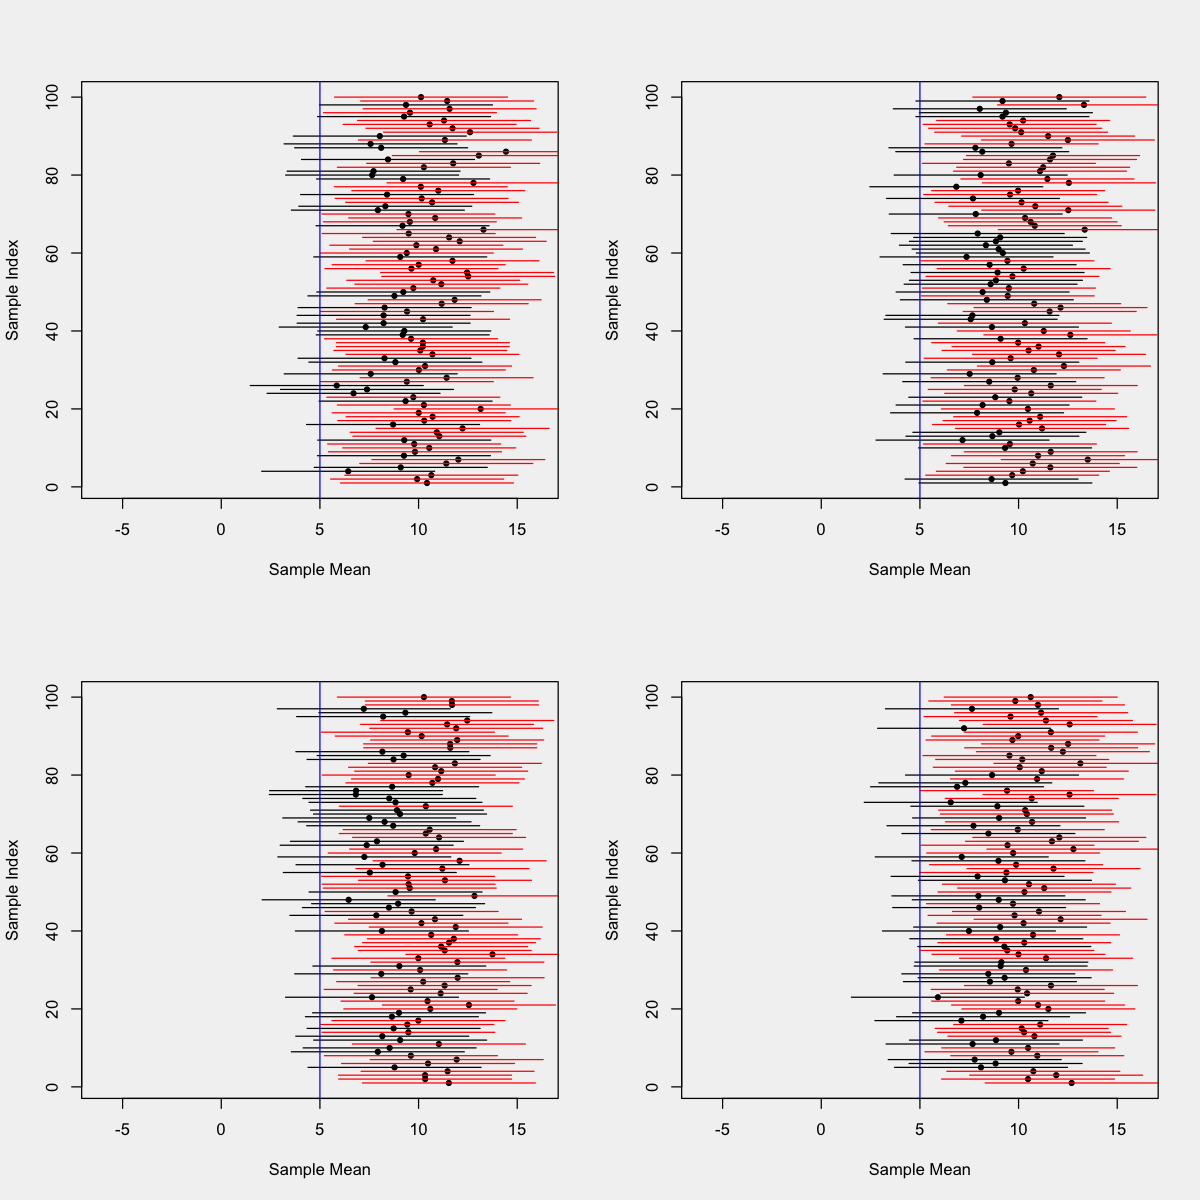

In [233]:
n = 50
n_samples = 100
k=0.5

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

In [ ]:
n = 50
n_samples = 100
k=0.9

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))